# Assignment 3 ML Data Product
**Panalee Makha**

## 1. Import dataset

In [2]:
import sys
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np

In [10]:
from data.make_dataset import *
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

In [11]:
print(X_train.shape), print(y_train.shape)

(8111999, 13)
(8111999,)


(None, None)

In [4]:
print(X_train)

[[ 1.07916650e+07 -9.95738027e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.53247500e+06 -7.88605694e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.91918400e+06 -5.74075777e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.18766450e+07 -4.60646166e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.16629820e+07  4.85011571e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.58366700e+06  1.26422368e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [5]:
X_train

array([[ 1.07916650e+07, -9.95738027e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.53247500e+06, -7.88605694e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.91918400e+06, -5.74075777e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.18766450e+07, -4.60646166e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.16629820e+07,  4.85011571e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.58366700e+06,  1.26422368e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [6]:
X_train.dtype

dtype('float64')

In [9]:
print(y_train)

[-0.31391783 -0.50182474 -1.22936172 ... -0.89209292  1.17970114
 -0.04892092]


In [10]:
print(X_val.shape), print(y_val.shape)

(2704000, 13)
(2704000,)


(None, None)

In [11]:
print(X_test.shape), print(y_test.shape)

(2704000, 13)
(2704000,)


(None, None)

In [12]:
print(X_test)

[[ 1.87300400e+06 -5.74075777e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.03034670e+07 -7.09698138e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.05950000e+05 -2.80335952e-15  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.53272400e+06  2.11300988e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.23547700e+06  1.32340435e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.66250000e+05 -2.80335952e-15  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [13]:
print(y_test)

[-0.88245667  0.20403068 -0.46819422 ... -0.17901031  0.91475241
 -0.34774108]


## 2. Baseline model

In [16]:
from models.null import NullRegressor
base_model = NullRegressor()
y_base = base_model.fit_predict(y_train)
from models.predict_model import print_regressor_scores
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

MSE Training: 1.0008648851928268
MAE Training: 0.7466010716968183
R2_score Training: 0.0


## 3. Train Models

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 3.1 Linear regression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_lr = lr.predict(X_train)
y_pred_lr_val = lr.predict(X_val)

print_regressor_scores(y_pred_lr,y_train,set_name='Training')

MSE Training: 0.5780178562559559
MAE Training: 0.5324026801166569
R2_score Training: 0.422482


In [9]:
print_regressor_scores(y_pred_lr_val,y_val,set_name='Validation')

MSE Validation: 0.5740990114673724
MAE Validation: 0.5319882473375718
R2_score Validation: 0.42367


### 3.2 Rigde

In [10]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create the Ridge model
ridge_model = Ridge()

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.01137e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.01134e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.01138e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.01148e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_absolute_error')

In [11]:
# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Get the best Ridge model
best_ridge_model = grid_search.best_estimator_
best_ridge_model

Ridge(alpha=10.0)

In [12]:
y_pred_rd_t = best_ridge_model.predict(X_train)
y_pred_rd_val = best_ridge_model.predict(X_val)

In [13]:
print_regressor_scores(y_pred_rd_t,y_train,set_name='Training')

MSE Training: 0.5780178562735491
MAE Training: 0.5324025428621837
R2_score Training: 0.422482


In [14]:
print_regressor_scores(y_pred_rd_val,y_val,set_name='Validation')

MSE Validation: 0.5740990089337124
MAE Validation: 0.5319881134305428


R2_score Validation: 0.42367


## 3.3 ElesticNETCV

In [15]:
from sklearn.linear_model import ElasticNetCV
elasticnet_model = ElasticNetCV(cv=5)  # cross-validation folds
elasticnet_model.fit(X_train, y_train)

ElasticNetCV(cv=5)

In [16]:
y_predt_elas = elasticnet_model.predict(X_train)
y_predv_elas = elasticnet_model.predict(X_val)

In [17]:
print_regressor_scores(y_predt_elas,y_train,set_name='Training')

MSE Training: 0.9926724834603645
MAE Training: 0.7409477757451758
R2_score Training: 0.008185


In [18]:
print_regressor_scores(y_predv_elas,y_val,set_name='Validation')

MSE Validation: 0.987982421007103
MAE Validation: 0.7406703369020408
R2_score Validation: 0.008179


### 3.4 KNeighbors

#### 3.4.1 KNN Default

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn0 = KNeighborsRegressor()
knn0.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
y_predt_knn0 = knn0.predict(X_train)
y_predv_knn0 = knn0.predict(X_val)

In [44]:
print_regressor_scores(y_predt_knn0,y_train,set_name='Training')

MSE Training: 0.14977493356603733
MAE Training: 0.14415111416301804
R2_score Training: 0.850354


In [45]:
print_regressor_scores(y_predv_knn0,y_val,set_name='Validation')

MSE Validation: 0.25130637390785776
MAE Validation: 0.1985621777400243
R2_score Validation: 0.747717


#### 3.4.2 KNN Hyperparameters tunning

**[3.4.2.1]** __neighbors__ with __weights='uniform',p=1__

n_neighbors = 3

In [12]:
knn1 = KNeighborsRegressor(n_neighbors=3, weights='uniform',p=1)

In [13]:
knn1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [34]:
y_predt_knn1 = knn1.predict(X_train)
y_predv_knn1 = knn1.predict(X_val)

In [35]:
print_regressor_scores(y_predt_knn1,y_train,set_name='Training')

MSE Training: 0.07434426129916158
MAE Training: 0.08915476966923809
R2_score Training: 0.92572


In [36]:
print_regressor_scores(y_predv_knn1,y_val,set_name='Validation')

MSE Validation: 0.18352227344302363
MAE Validation: 0.15464964584016708
R2_score Validation: 0.815765


n_neighbors = 5

In [37]:
knn2 = KNeighborsRegressor(n_neighbors=5, weights='uniform',p=1)

In [38]:
knn2.fit(X_train,y_train)

KNeighborsRegressor(p=1)

In [39]:
y_predt_knn2 = knn2.predict(X_train)
y_predv_knn2 = knn2.predict(X_val)

In [40]:
print_regressor_scores(y_predt_knn2,y_train,set_name='Training')

MSE Training: 0.1333846804726534
MAE Training: 0.13920117803996596
R2_score Training: 0.866731


In [41]:
print_regressor_scores(y_predv_knn2,y_val,set_name='Validation')

MSE Validation: 0.22498220379230474
MAE Validation: 0.19138270262634138
R2_score Validation: 0.774144


n_neighbors = 7

In [47]:
knn3 = KNeighborsRegressor(n_neighbors=7, weights='uniform',p=1)

In [48]:
knn3.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [49]:
y_predt_knn3 = knn3.predict(X_train)
y_predv_knn3 = knn3.predict(X_val)

In [50]:
print_regressor_scores(y_predt_knn3,y_train,set_name='Training')

MSE Training: 0.18334921552062164
MAE Training: 0.1787034538689421
R2_score Training: 0.816809


In [51]:
print_regressor_scores(y_predv_knn3,y_val,set_name='Validation')

MSE Validation: 0.26537805809705756
MAE Validation: 0.22471039302095053
R2_score Validation: 0.733591


n_neighbors = 9

In [52]:
knn4 = KNeighborsRegressor(n_neighbors=9, weights='uniform',p=1)

In [53]:
knn4.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [54]:
y_predt_knn4 = knn4.predict(X_train)
y_predv_knn4 = knn4.predict(X_val)

In [55]:
print_regressor_scores(y_predt_knn4,y_train,set_name='Training')

MSE Training: 0.22849001399035393
MAE Training: 0.2141479572850291
R2_score Training: 0.771707


In [56]:
print_regressor_scores(y_predv_knn4,y_val,set_name='Validation')

MSE Validation: 0.3042548563033092
MAE Validation: 0.2565445348527356
R2_score Validation: 0.694563


### 3.5 Gradient Boosting 

In [24]:
gbr = GradientBoostingRegressor(random_state=42)

In [25]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
y_predt_gbr = gbr.predict(X_train)
y_predv_gbr = gbr.predict(X_val)

In [27]:
print_regressor_scores(y_predt_gbr,y_train,set_name='Training')

MSE Training: 0.4363876276875493
MAE Training: 0.46494568077869214
R2_score Training: 0.563989


In [28]:
print_regressor_scores(y_predv_gbr,y_val,set_name='Validation')

MSE Validation: 0.4350364578865359
MAE Validation: 0.46464232444901876
R2_score Validation: 0.563273


## 4. Best Model

The best model is __KNN1__ or __KNeighborsRegressor__ with __neighbors = 3__,__weights='uniform'__ and, __p=1__, which provided the lowest mse = 0.074 on train set and 0.183 on validate set.

**[4.1] Save the best model**

In [4]:
knn_best = KNeighborsRegressor(n_neighbors=3, weights='uniform',p=1)

In [5]:
import joblib 
joblib.dump(knn_best,'../../models/knn.joblib')

['../../models/knn.joblib']

**[4.2] Training the best model on Test set**

In [14]:
y_pred_test = knn1.predict(X_test)

In [17]:
print_regressor_scores(y_pred_test,y_test,set_name='Test')

MSE Test: 0.18750798004465966
MAE Test: 0.15502215949719364
R2_score Test: 0.812731


**[4.3] Model Prediction Comparison**

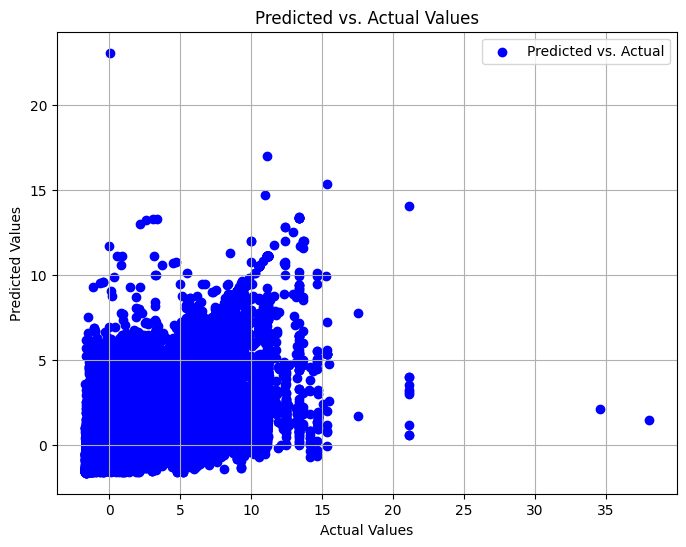

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot for comparison
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid()
plt.show()